In [1]:
# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Deep Learning FDP/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8001 images belonging to 2 classes.


In [5]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Deep Learning FDP/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


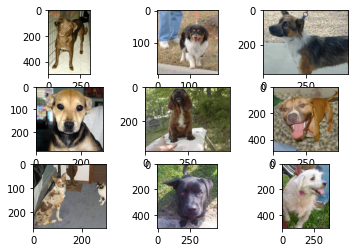

In [6]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '/content/drive/My Drive/Deep Learning FDP/dataset/training_set/dogs/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'dog.' + str(i+1) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

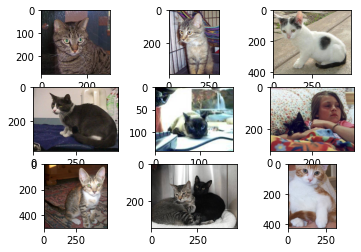

In [7]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '/content/drive/My Drive/Deep Learning FDP/dataset/training_set/cats/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'cat.' + str(i+1) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [8]:
# Initialising the CNN
classifier = Sequential()

In [9]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [10]:
# Step 3 - Flattening
classifier.add(Flatten())

In [11]:
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [12]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
from timeit import default_timer as timer
start = timer()


 

history =classifier.fit_generator(training_set,                         
                         epochs = 25,
                         validation_data = test_set
                         )

end = timer() 
print('Training Completed!')
print("Time Elapsed in seconds",  (end - start))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
 62/251 [======>.......................] - ETA: 47:23 - loss: 0.6918 - accuracy: 0.5181

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


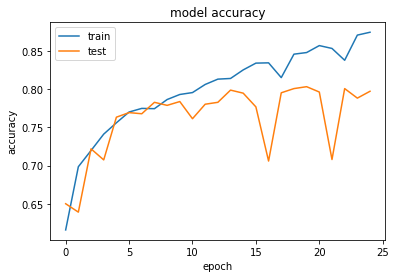

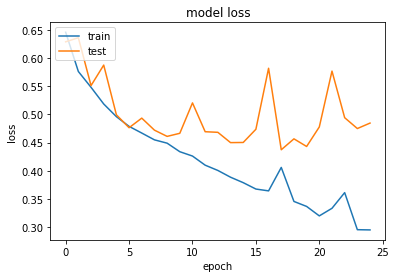

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')



plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# save model and architecture to single file
classifier.save('/content/drive/My Drive/Deep Learning FDP/dataset/FDPCNN1.h5')
classifier.summary()

print("Saved model to disk")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [ ]:
# Loading saved model from Drive.
from keras.models import load_model
model = load_model('/content/drive/My Drive/Deep Learning FDP/dataset/FDPCNN1.h5')
print("Model is Loaded")
model.summary()

Model is Loaded
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)  

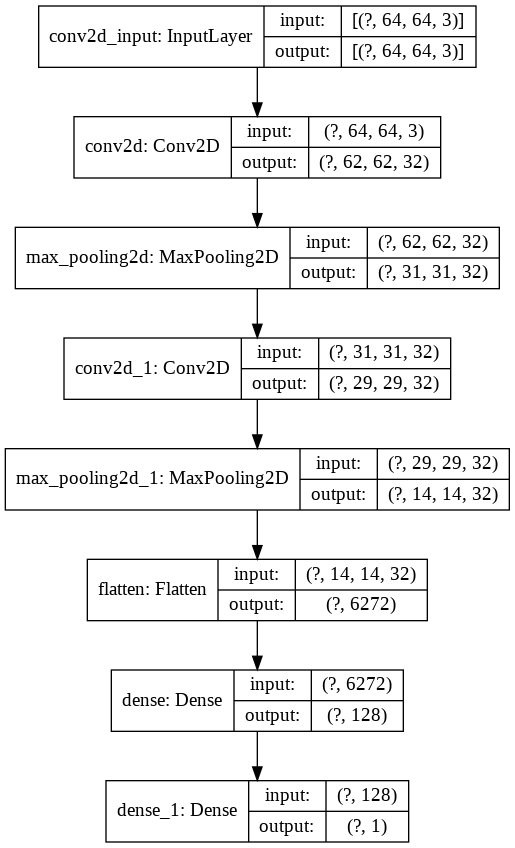

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_CNN.png', show_shapes=True, show_layer_names=True)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cat.4001.jpg to cat.4001.jpg


In [ ]:
# Part 3 - Making new predictions

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('cat.4001.jpg', target_size = (64, 64))
test_image1 = image.img_to_array(test_image)
test_image1 = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image1)
print(result)
#training_set.class_indices
if result[0][0] == 1:
    prediction = 'The given image is of Dog'
    print(prediction)
else:
    prediction = 'The given image is of Cat'
    print(prediction)





[[1.]]
The given image is of Dog


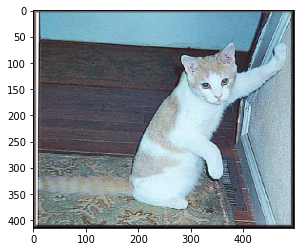

Model prediction : The given image is of Dog


In [ ]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread

# load image pixels
image = imread('cat.4001.jpg')
# plot raw pixel data
pyplot.imshow(image)
# show the figure
pyplot.show()

print("Model prediction :", prediction)

In [ ]:
from keras.models import load_model

model = load_model('/content/drive/My Drive/Deep Learning FDP/dataset/FDPCNN1.h5')
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(test_set)
print('test loss, test acc:', results)


# Evaluate on test data
63/63 [==============================] - 7s 116ms/step - loss: 0.4844 - accuracy: 0.7975
test loss, test acc: [0.4844425916671753, 0.7975000143051147]


In [ ]:
import pandas as pd
test_set.reset
ytesthat = model.predict_generator(test_set)
print(ytesthat)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

Instructions for updating:
Please use Model.predict, which supports generators.
[[0.51380306]
 [0.9784384 ]
 [0.99816126]
 ...
 [0.6501436 ]
 [0.95586324]
 [0.85657966]]


In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df


,filename,predict,y,y_pred
0,cats/cat.4001.jpg,0.51380,0,1
1,cats/cat.4002.jpg,0.97844,0,1
2,cats/cat.4003.jpg,0.99816,0,1
3,cats/cat.4004.jpg,0.92787,0,1
4,cats/cat.4005.jpg,0.02589,0,0
...,...,...,...,...
1995,dogs/dog.4996.jpg,0.16070,1,0
1996,dogs/dog.4997.jpg,0.02308,1,0
1997,dogs/dog.4998.jpg,0.65014,1,1
1998,dogs/dog.4999.jpg,0.95586,1,1


In [ ]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 2000 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 2000 Validation images : 1007


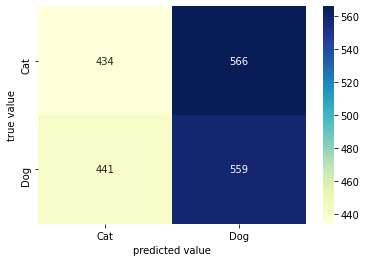

In [ ]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'] );
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('cat_or_dog_1.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0 )
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

FileNotFoundError: ignored

Number of Dogs predicted as cat


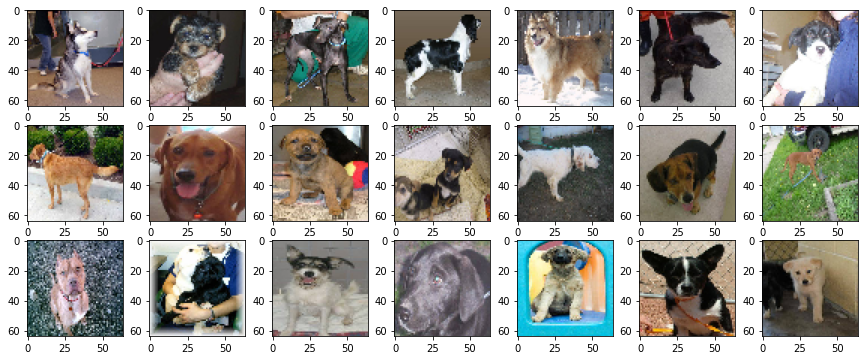

In [ ]:
import matplotlib.image as mpimg

DogasCat = df['filename'][(df.y==1)&(df.y_pred==0)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    #img = mpimg.imread()
    img = image.load_img('/content/drive/My Drive/Deep Learning FDP/dataset/test_set/'+DogasCat.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
print("Number of Dogs predicted as cat")
plt.show()

Number of Cats predicted as Dog


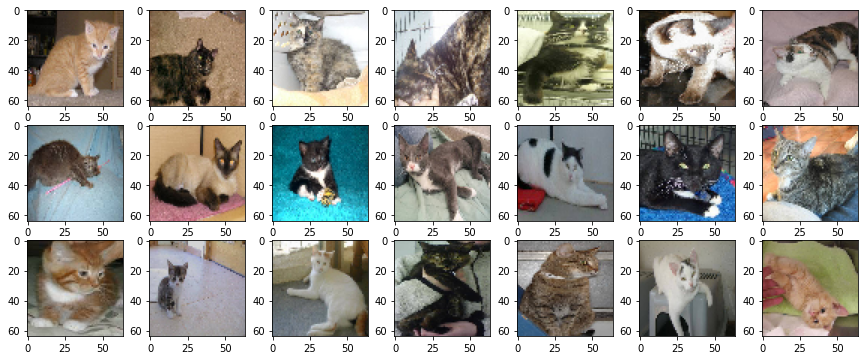

In [ ]:
import matplotlib.image as mpimg

DogasCat = df['filename'][(df.y==0)&(df.y_pred==1)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    #img = mpimg.imread()
    img = image.load_img('/content/drive/My Drive/Deep Learning FDP/dataset/test_set/'+DogasCat.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
print("Number of Cats predicted as Dog")
plt.show()

In [ ]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']


In [ ]:
%%capture
# Model Accuracy
x1 = model.evaluate_generator(training_set)
x2 = model.evaluate_generator(test_set)

In [ ]:
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install streamlit

In [ ]:
!pip install pyngrok

     |████████████████████████████████| 747kB 7.6MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19246 sha256=39062159167cf8ed64e25806172600bd70a9d42121b2c768307a1fdcd0f5b449
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok


In [ ]:
!ngrok authtoken 1oEm0wopEJyjrT38ULluwUKK5fq_7ai4ZocZJ2YuFuoiJfoMh

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.preprocessing import image
import os
from werkzeug.utils import secure_filename
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
st.set_option('deprecation.showfileUploaderEncoding', False)
# Loading saved model from Drive.
from keras.models import load_model
model = load_model('/content/drive/My Drive/Deep Learning FDP/dataset/FDPCNN1.h5')

html_temp = """
   <div class="" style="background-color:blue;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">Poornima Institute of Engineering & Technology</p></center> 
   <center><p style="font-size:30px;color:white;margin-top:10px;">Machine Learning Lab Experiment</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)
  
st.title("""
        Image Classification Cat/ Dog
         """
         )
file= st.file_uploader("Please upload image", type=("jpg", "png"))

import cv2
from  PIL import Image, ImageOps
def import_and_predict(image_data):
  #x = cv2.resize(image_data, (48, 48)) 
  #img = image.load_img(image_data, target_size=(48, 48))
  #x = image.img_to_array(img)
  size=(64, 64)
  image=ImageOps.fit(image_data, size, Image.ANTIALIAS)
  img=np.asarray(image)
  img_reshape=np.expand_dims(img, axis=1)
  img_reshape=img[np.newaxis,...]
  result = model.predict(img_reshape)
  print(result)
  #training_set.class_indices
  if result[0][0] == 1:
    prediction = "Dog" 
    print(prediction)
  else:
    prediction = 'Cat'
    print(prediction)#x = np.expand_dims(x, axis=1)
  
  
  return prediction
if file is None:
  st.text("Please upload an Image of Cat/ Dog")
else:
  image=Image.open(file)
  #image=np.array(image)
  #file_bytes = np.asarray(bytearray(file.read()), dtype=np.uint8)
  #image = cv2.imdecode(file_bytes, 1)
  st.image(image,caption='Uploaded Image.', use_column_width=True)
    
if st.button("Predict Cat/Dog"):
  result=import_and_predict(image)
  st.success('Model has predicted the image  is  of  {}'.format(result))
if st.button("About"):
  st.header(" Deepak Moud")
  st.subheader("Assistant Professor, Department of Computer Engineering")
  
html_temp = """
   <div class="" style="background-color:orange;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:20px;color:white;margin-top:10px;">Machine Learning Experiment no. 14</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)

Overwriting app.py


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

<NgrokTunnel: "http://c66e6d854ccc.ngrok.io" -> "http://localhost:80">

In [ ]:
!streamlit run --server.port 80 app.py

2021-04-07 13:05:49.787 An update to the [server] config option section was detected. To have these changes be reflected, please restart streamlit.
2021-04-07 13:05:50.091070: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://35.247.21.7:80

2021-04-07 13:05:51.265516: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-07 13:05:51.266306: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-07 13:05:51.272630: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-07 13:05:51.273413: I tensorflow/core/common_runtime/gpu/gpu_device.c

In [ ]:
ngrok.kill()